### FIR filter

\begin{equation}
Y_{FIR}[z] = X_{FIR}[z] \cdot (2^{33} + (bb \cdot 2^{5} - 2^{33})z^{-1})
\end{equation}

\begin{align}
b[0] & = 2^{33} \\
b[1] & = bb \cdot 2^{5} - 2^{33}
\end{align}

### IIR1 filter

\begin{equation}
Y_{IIR1}[z] = X_{IIR1}[z] \cdot \frac{1}{2^{33} + (aa \cdot 2^{8} - 2^{33})z^{-1}}
\end{equation}

\begin{align}
a[0] & = 1 \\
a[1] & = aa \cdot 2^{-25} - 1
\end{align}

### IIR2 filter

\begin{equation}
Y_{IIR2}[z] = X_{IIR2}[z] \cdot \frac{1 \cdot z^{-1}}{1 - pp \cdot 2^{-16} \cdot z^{-1}}
\end{equation}

\begin{align}
b[0] & = 0 \\
b[1] & = 1 \\
a[0] & = 1 \\
a[1] & = pp \cdot 2^{-16}
\end{align}

### Scaling multiplier

\begin{equation}
Y_{MUL}[z] = X_{MUL}[z] \cdot pp
\end{equation}


### Entire filter

\begin{equation}
X_{OUT} = 
\end{equation}


In [20]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [29]:
FS = 125000000

filters = { 1.0: (0x7D93, 0x437C7, 0xd9999a, 0x2666),
           20.0: (0x4C5F, 0x2F38B, 0xd9999a, 0x2666)}

[aa, bb, kk, pp] = filters[1.0]

In [32]:
fir  = ([2^33, bb*2^5-2^33], 1)
iir1 = (1, [2^33, aa*2^8-2^33])
fir2 = ([0, 1], [1, pp*2^(-16)])

In [33]:
w, h = signal.freqz(fir[0], fir[1])

In [35]:
w, h = signal.freqz([2^33, bb*2^5-3^33])

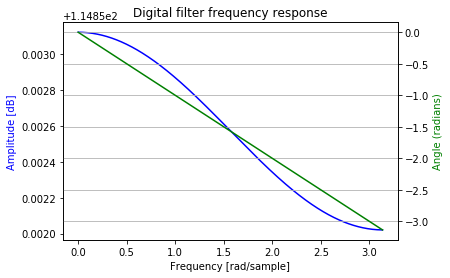

In [36]:

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


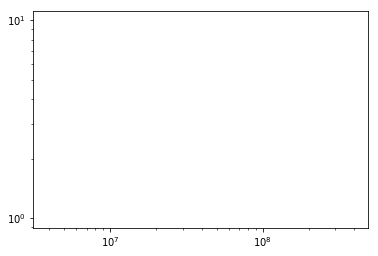

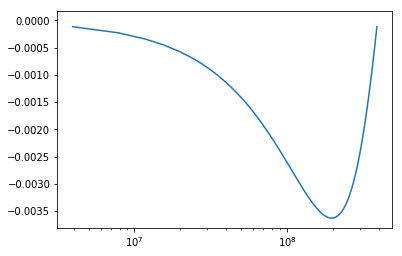

In [15]:
w, mag, phase = signal.dbode(fir)

plt.figure()
plt.loglog(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()